In [1]:
using Pkg
Pkg.activate(".")
using QuadGK
using Plots

  Activating project at `c:\Users\tim\Documents\2025examples\03-06`


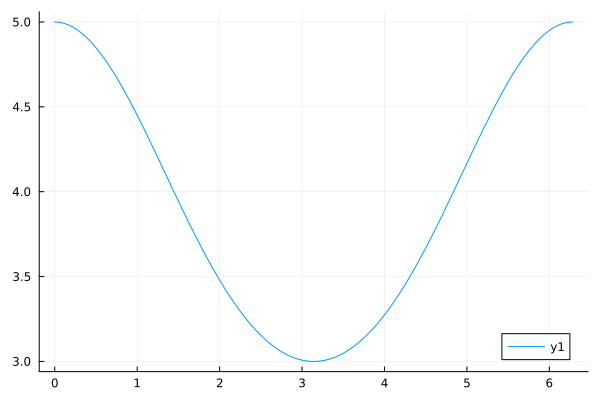

In [2]:
f(τ, l̃) = cos(τ) + sqrt(cos(τ)^2 + l̃^2 - 1);
T = 2π
plot(t -> f(t,4), 0,T)

In [3]:
a0(l) = 1/T*quadgk(τ -> f(τ, l), -T / 2, T / 2)[1]
a0(3)

2.9148449258083904

In [4]:
an(n,l) = 2/T*quadgk(τ -> f(τ, l)*cos(n*τ), -T/2, T/2)[1]
[an(i, 4) for i in 1:5]

5-element Vector{Float64}:
  1.0000000000000004
  0.06350626057674383
  1.150872621587873e-15
 -0.0002561319482520858
 -8.71184190789012e-15

In [5]:
bn(n, l) = 2/T*quadgk(τ -> f(τ, l) * sin(n * τ), -T / 2, T / 2)[1]
[bn(i, 4) for i in 1:5]

5-element Vector{Float64}:
 5.678496366629132e-15
 5.562974516465468e-16
 1.5686717612877417e-14
 1.783850775710299e-15
 3.280925732087807e-16

In [6]:
A0 = a0(4)
An = [an(i, 4) for i in 1:10]
y(τ,N) = A0 + sum(An[i]*cos(i*τ) for i in 1:N)

y (generic function with 1 method)

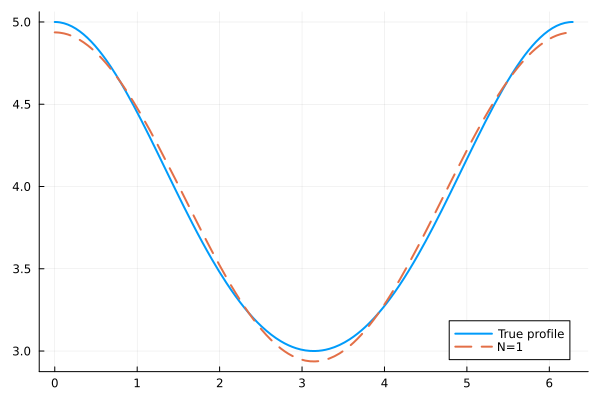

In [14]:
plot(t -> f(t, 4), 0, T, lw=2, label="True profile")
plot!(t-> y(t,1), 0, T, lw=2, linestyle=:dash, label="N=1")